CREATING A CNN MODEL TO DETECT INVASIVE DUCTAL CARCINOMA(IDC) BREAST CANCER

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from os import listdir
import glob
import keras.utils as image
import cv2
import random


IMPORTING THE DATASET


In [2]:
breast_img = glob.glob(r'C:\Users\LENOVO\Documents\VIT\CODES\AI ML\NEURAL NETWORK\CNN\project\DATA\IDC_regular_ps50_idx5/**/*.png', recursive = True)
# the glob function finds all the pathnames matching a specified pattern (similar to regex) 


for imgname in breast_img[:3]:
    print(imgname)

C:\Users\LENOVO\Documents\VIT\CODES\AI ML\NEURAL NETWORK\CNN\project\DATA\IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1001_class0.png
C:\Users\LENOVO\Documents\VIT\CODES\AI ML\NEURAL NETWORK\CNN\project\DATA\IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1051_class0.png
C:\Users\LENOVO\Documents\VIT\CODES\AI ML\NEURAL NETWORK\CNN\project\DATA\IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1101_class0.png


DATA ANALYSIS

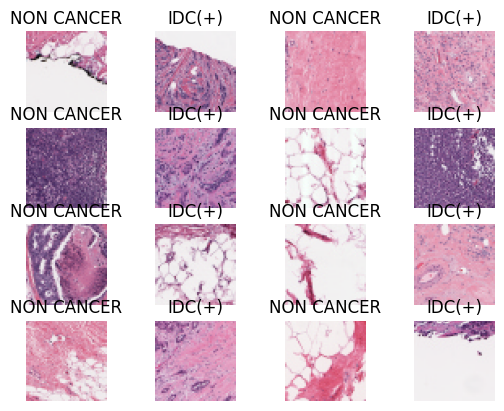

In [3]:
non_cancer=[]
cancer=[]

for img in breast_img:
    if img[-5]=='0':
        non_cancer.append(img)
    elif img[-5]=='1':
        cancer.append(img)

random_noncan=np.random.randint(0,len(non_cancer),8)
random_can=np.random.randint(0,len(cancer),8)

s=0

for num in random_noncan:
    img=image.load_img((non_cancer[num]),target_size=(100,100))
    img=image.img_to_array(img)

    plt.subplot(4,4,2*s+1)
    plt.axis('off')
    plt.title('NON CANCER')
    plt.imshow(img.astype('uint8'))
    s+=1

s=1

for num in random_can:
    img=image.load_img((cancer[num]),target_size=(100,100))
    img=image.img_to_array(img)

    plt.subplot(4,4,2*s)
    plt.axis('off')
    plt.title('IDC(+)')
    plt.imshow(img.astype('uint8'))
    s+=1


In [4]:
new_nc=non_cancer[:78786]
print(len(cancer))
print(len(new_nc))

78786
78786


In [5]:
non_img_arr = []
can_img_arr = []

for img in new_nc:
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])
    
for img in cancer:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [6]:
print(len(non_img_arr))
print(len(can_img_arr))

78786
78786


In [7]:
X = []
y = []

breast_img_arr = np.concatenate((non_img_arr[:12389], can_img_arr[:12389]))
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [8]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of non cancer Images: {}'.format(np.sum(b==0)))
    print('Number of cancer Images: {}'.format(np.sum(b==1)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,y)

Total number of images: 24778
Number of non cancer Images: 20893
Number of cancer Images: 3885
Image shape (Width, Height, Channels): (50, 50, 3)


Splitting the data into training and testing set

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=16)

from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train, num_classes = 2)
Y_test = to_categorical(y_test, num_classes = 2)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (16105, 50, 50, 3)
Testing Data Shape: (8673, 50, 50, 3)


In [10]:
X_train=X_train/255
X_test=X_test/255

Creating the model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.metrics import binary_crossentropy
from sklearn.metrics import confusion_matrix

In [12]:
model=Sequential()



In [13]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(50,50,3)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(units=2,activation='sigmoid'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0

In [15]:
model.compile(optimizer='adam',loss=binary_crossentropy,metrics=['accuracy'])

In [16]:
pred=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=20)

Epoch 1/20
504/504 [==============================] - 58s 104ms/step - loss: 0.3883 - accuracy: 0.8643 - val_loss: 0.3660 - val_accuracy: 0.8411
Epoch 2/20
504/504 [==============================] - 50s 99ms/step - loss: 0.2671 - accuracy: 0.8920 - val_loss: 0.4099 - val_accuracy: 0.8837
Epoch 3/20
504/504 [==============================] - 50s 100ms/step - loss: 0.2503 - accuracy: 0.8952 - val_loss: 0.3809 - val_accuracy: 0.8003
Epoch 4/20
504/504 [==============================] - 50s 98ms/step - loss: 0.2365 - accuracy: 0.9018 - val_loss: 0.3842 - val_accuracy: 0.8751
Epoch 5/20
504/504 [==============================] - 50s 100ms/step - loss: 0.2278 - accuracy: 0.9030 - val_loss: 0.3072 - val_accuracy: 0.9012
Epoch 6/20
504/504 [==============================] - 50s 99ms/step - loss: 0.2213 - accuracy: 0.9066 - val_loss: 0.2884 - val_accuracy: 0.8878
Epoch 7/20
504/504 [==============================] - 50s 100ms/step - loss: 0.2119 - accuracy: 0.9102 - val_loss: 0.3947 - val_accur

272/272 [==============================] - 6s 20ms/step


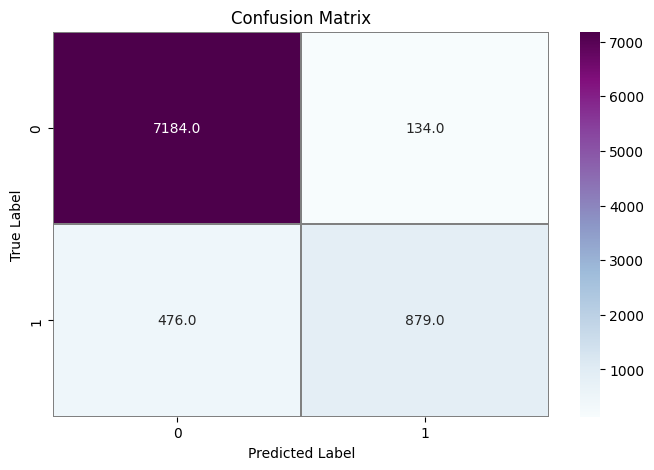

In [17]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 
#accuracy=accuracy_score(y_true=Y_true, y_pred=Y_pred)
#print(accuracy)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [18]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(loss)
print(accuracy)

272/272 [==============================] - 6s 21ms/step - loss: 0.2468 - accuracy: 0.9297
0.24677947163581848
0.9296667575836182


Testing the model for a random image

1/1 [==============================] - 0s 30ms/step
Predicted Value using  cnn model 0
True Value 0


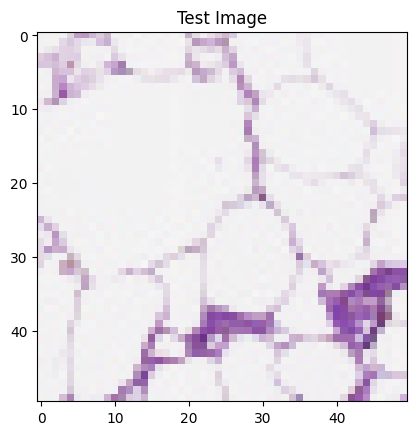

In [19]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])

index = 1000
img_plot(X_test,index)
input = X_test[index:index+1]
pred = model.predict(input)[0].argmax()
label = Y_test[index].argmax()
print('Predicted Value using  cnn model',pred)
print("True Value",label)

True label and predicted label is the same and thus the model is working correctly with accuracy of close to 93%